<a href="https://colab.research.google.com/github/MMathisLab/LINdoscope2023/blob/main/notebooks/CEBRA_LINdoscope2023_2Pdemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 👋  Welcome to the CEBRA demo!

![alt text](https://images.squarespace-cdn.com/content/v1/57f6d51c9f74566f55ecf271/6f3943a1-b76d-4674-9df9-87aebd33e517/cebralogo.png?format=2500w)


 - Hello, LINdoscope 2023!

 - This demo is aimed at showing you how to use CEBRA on the 2P dataset from the LINdoscope alumns (thanks!)
 - But for many more options, ideas, and demos we really recommend checking out: cebra.ai/demos

##### Authored by Anastasiia Filippova & Mackenzie Mathis (MW Mathis Lab @ EPFL)

In [1]:
!pip install cebra

In [2]:
import cebra
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cebra.integrations.matplotlib as cebra_plot

from cebra import CEBRA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Lets be sure you have access to the drive! You may need to mount this to add a link in your "My Drive" directory.
# you should see the DLC_models directory:
%cd /content/drive/MyDrive/LINdoscope2023_analysis
%ls

/content/drive/.shortcut-targets-by-id/1MCbA_XWnvaUo_aH2Nu4A3Sg_UwDbwAia/LINdoscope2023_analysis
cebra_cebra_beh_model.pt  docs/       sample_data/
DLC_models/               README.txt  student_data/


In [5]:
data_path = '/content/drive/MyDrive/LINdoscope2023_analysis/sample_data/CEBRA/2P_dCA1_calcium_behaviour.h5'

## Data preprocessing & checks

In [6]:
keypoints = ['nosetip', 'forehead', 'mouthtip', 'chin', 'tearduct',
             'eyelid1', 'eyelid2', 'pupil1', 'pupil2', 'pupil3', 'pupil4', 'pupil5',
             'pupil6', 'nose', 'mouth', 'eartip', 'paw_front-right1',
             'paw_front-right2', 'paw_front-right3', 'paw_front-left',
             'paw_back-right1', 'paw_back-right2', 'paw_back-right3',
             'paw_back-left', 'tail1', 'tail2', 'tail3', 'back']
dlc_factors = ['x', 'y', 'likelihood']

neural_columns = [f'neuron_{i}' for i in range(977)]

nn_neurons = 976
max_iterations = 5000

In [7]:
dlc_columns = []
for keypoint in keypoints:
    dlc_columns += [f'{keypoint}_{factor}' for factor in dlc_factors]

columns = neural_columns + dlc_columns + [f'metadata_{i}' for i in range(39)]
dlc_columns_selected = [column for column in dlc_columns if column.find('likelihood') == -1 ]

In [8]:
data = cebra.load_data(data_path)
dataframe = pd.DataFrame(data, columns=columns)

In [9]:
neural_data = dataframe.loc[:, neural_columns]
dlc_data = dataframe.loc[:, dlc_columns_selected]
velocity = dataframe.iloc[:, -35]

### Let's quickly look at the data:

In [10]:
neural_data.head()

,neuron_0,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,...,neuron_967,neuron_968,neuron_969,neuron_970,neuron_971,neuron_972,neuron_973,neuron_974,neuron_975,neuron_976
0,175.135605,163.6445,147.154982,197.7159,143.993662,94.363458,94.572285,103.375374,161.40591,150.68912,...,207.558657,172.656696,111.184334,171.391488,159.068233,118.525,187.795604,12.299816,328.163857,-7.039105
1,175.135605,163.6445,147.154982,197.7159,143.993662,94.363458,94.572285,103.375374,161.40591,212.489833,...,207.558657,172.656696,111.184334,171.391488,159.068233,118.525,187.795604,12.299816,328.163857,-7.039105
2,175.135605,163.6445,147.154982,197.7159,143.993662,94.363458,94.572285,103.375374,161.40591,218.25658,...,207.558657,172.656696,111.184334,171.391488,159.068233,118.525,187.795604,12.299816,328.163857,-7.039105
3,175.135605,163.6445,147.154982,197.7159,143.993662,94.363458,94.572285,103.375374,161.40591,214.475173,...,207.558657,172.656696,111.184334,171.391488,159.068233,118.525,187.795604,12.299816,328.163857,-7.039105
4,175.135605,163.6445,147.154982,197.7159,143.993662,94.363458,94.572285,103.375374,161.40591,209.352037,...,207.558657,172.656696,111.184334,171.391488,159.068233,118.525,187.795604,12.299816,328.163857,-7.039105


In [11]:
dlc_data.head()

,nosetip_x,nosetip_y,forehead_x,forehead_y,mouthtip_x,mouthtip_y,chin_x,chin_y,tearduct_x,tearduct_y,...,paw_back-left_x,paw_back-left_y,tail1_x,tail1_y,tail2_x,tail2_y,tail3_x,tail3_y,back_x,back_y
0,12.125243,303.6011,365.819756,5.339103,264.343252,503.114028,604.104265,570.114604,509.587865,183.688844,...,95.372528,328.766069,145.762225,215.450257,51.713261,166.358427,61.974337,348.635531,254.213484,166.021817
1,13.219281,306.946365,364.974262,5.592196,265.160694,503.03511,575.17322,581.971446,510.451762,183.728536,...,344.440616,360.464247,146.051212,204.840886,57.085036,170.157934,398.496686,578.859056,259.832176,149.685148
2,13.020226,310.350701,365.97354,5.650922,257.07727,503.471737,628.87427,590.092393,509.293458,184.380743,...,115.401569,345.648116,162.442533,192.574882,65.696947,148.011702,397.178278,578.142256,275.997442,138.522105
3,12.03262,305.098611,364.109762,5.426331,263.257436,503.574383,669.984945,594.140209,508.195735,184.51041,...,164.490554,347.364034,170.89532,199.621086,50.666165,108.280594,157.71829,351.858727,282.848481,143.628577
4,14.536986,304.810596,366.236229,5.31799,258.423063,503.6201,560.911989,563.761676,507.590761,183.93209,...,102.180954,351.989596,168.816662,200.525971,61.995951,104.683422,93.664356,354.531553,294.405293,141.915844


## Maybe this is a variable of interest, velocity perhaps? Lets plot it!



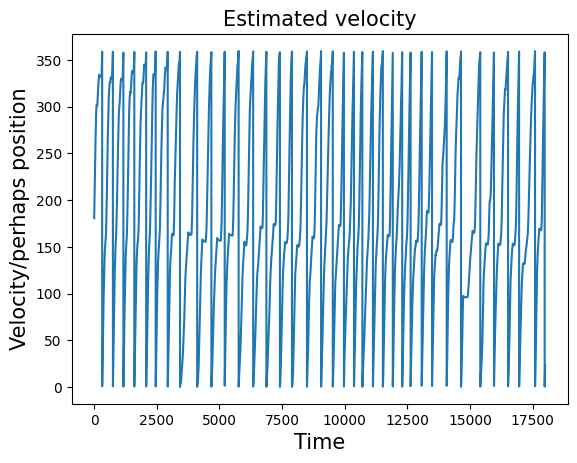

In [12]:
fontsize=15
# plt.figure(figsize=(15, 10))
plt.plot(velocity)
plt.title('Estimated velocity', fontsize=fontsize)
plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Velocity/perhaps position', fontsize=fontsize)
plt.show()

# 🦓 CEBRA training

- we recommend to start with CEBRA-Time

- you can find our suggested workflow here: https://cebra.ai/docs/usage.html

### CEBRA-Time

We will train CEBRA-Time first.

Models will be trained with default parameters, but they can be tuned with [grid-search](https://cebra.ai/docs/api/pytorch/helpers.html#module-cebra.grid_search).

`time_offset` represents the time gap between neural samples that form positive pair.

In [13]:
# No. of iterations to train. The default in CEBRA is 10K, but this data is not too long, so we can lower it.

iterations = 3000

In [14]:
cebra_time_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1.,
                        output_dimension=3,
                        max_iterations=iterations,
                        distance='cosine',
                        conditional='time',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

In [15]:
cebra_time_model.fit(neural_data)
cebra_time = cebra_time_model.transform(neural_data)

pos:  0.0012 neg:  5.4004 total:  5.4016 temperature:  1.0000: 100%|██████████| 3000/3000 [00:43<00:00, 68.71it/s]


## Analyze the embedding, part 1:
- plot embedding #1 & the loss; it should be < 6

<Axes: xlabel='Steps', ylabel='InfoNCE Loss'>

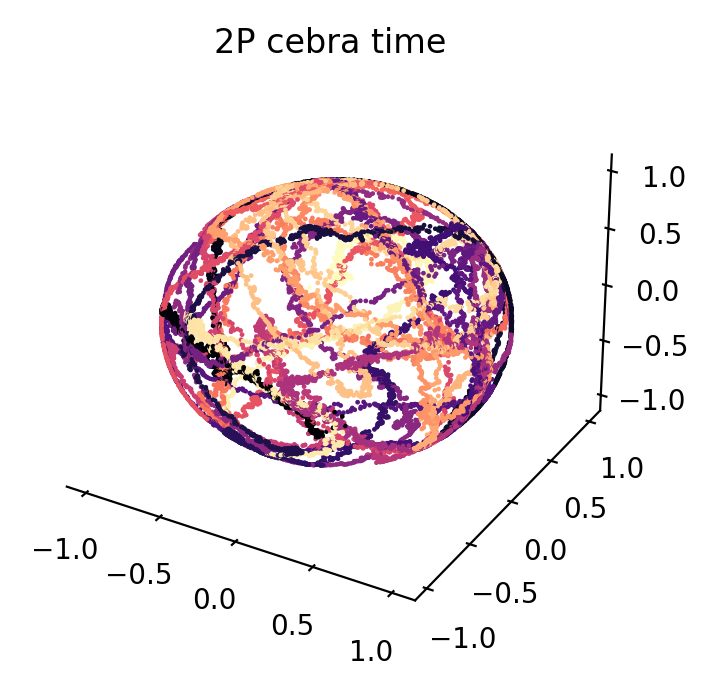

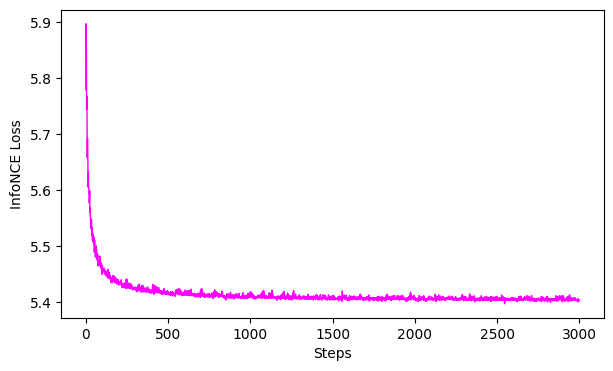

In [16]:
emd_ax = cebra_plot.plot_embedding(embedding=cebra_time,
                          cmap = 'magma',
                          embedding_labels=np.arange(cebra_time.shape[0]),
                          figsize = (4,8),
                          title='2P cebra time',
                          alpha=1, markersize=0.5, dpi=200)

cebra.plot_loss(cebra_time_model)

### Next, given we see some structure (yay 🎉), let's test a few more models ....

# 🦓 CEBRA-Behaviour

Now lets train cebra model guided by behaviour labels.

In order to do this we need to change sampling distribution in the CEBRA model from 'time' to 'time-delta'.

In [17]:
cebra_beh_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1.,
                        output_dimension=3,
                        max_iterations=iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

In [18]:
cebra_beh_model.fit(neural_data, velocity)
cebra_behaviour = cebra_beh_model.transform(neural_data)

#for the demo we don't save the models, but if you want to ...
#cebra_beh_model.save("cebra_cebra_beh_model.pt")

pos:  0.0517 neg:  5.4080 total:  5.4596 temperature:  1.0000: 100%|██████████| 3000/3000 [00:33<00:00, 89.84it/s]


<Axes: xlabel='Steps', ylabel='InfoNCE Loss'>

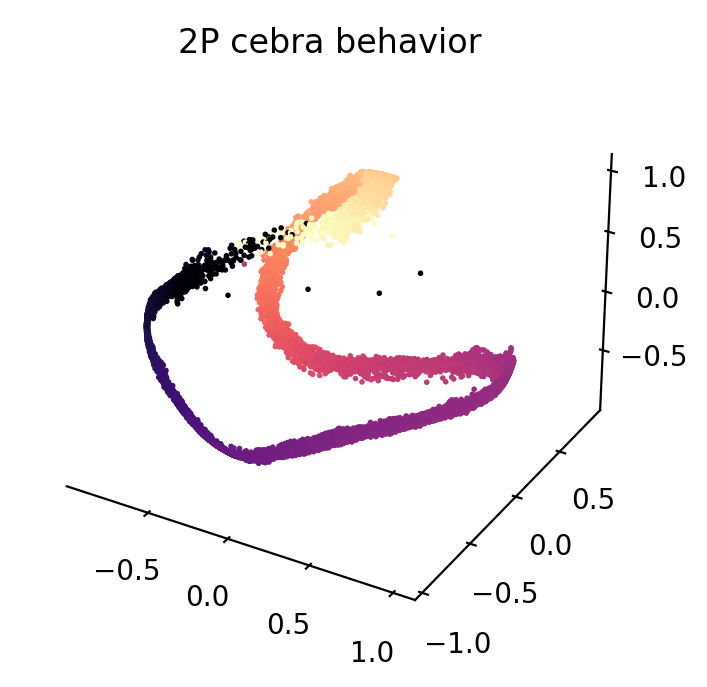

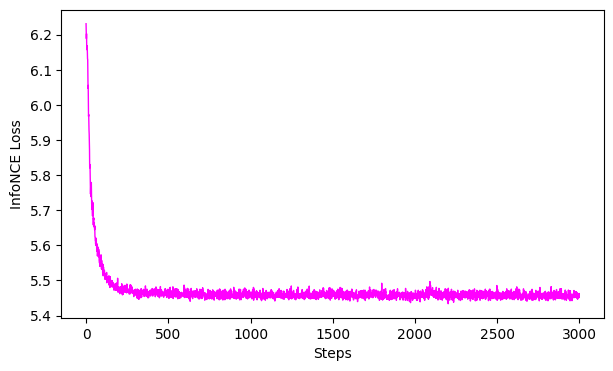

In [19]:
cebra_plot.plot_embedding(embedding=cebra_behaviour,
                          cmap = 'magma',
                          embedding_labels=velocity,
                          figsize = (4,8),
                          title='2P cebra behavior',
                          alpha=1, markersize=1, dpi=200)

cebra.plot_loss(cebra_beh_model)

## Comparing Models

- The lower the loss value at the same iter, the better the fit

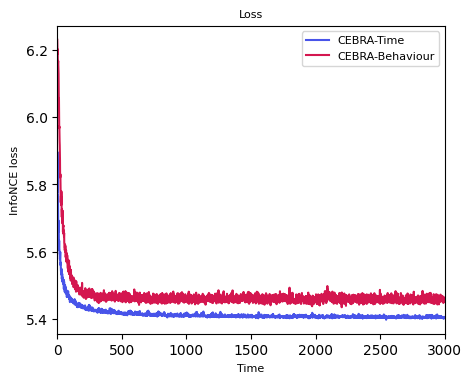

In [20]:
plt.figure(figsize=(5,4))
plt.plot(cebra_time_model.state_dict_['log']['total'],
         label='CEBRA-Time', c="#4854e9")
plt.plot(cebra_beh_model.state_dict_['log']['total'],
         label='CEBRA-Behaviour', c="#d4164f")
plt.xlim(left = 0, right = iterations)
plt.xlabel('Time', fontsize=8)
plt.ylabel('InfoNCE loss', fontsize=8)
plt.title('Loss', fontsize=8)
plt.legend(fontsize=8)

## We also want to check consistency, here across runs!

 - this is also useful to compare across animals (see Schneider, Lee, Mathis Nature 2023, Figure 1)
 - or compare across brain areas, tasks, etc .. anything you want to compare 🧠

In [21]:
number_runs = 4
cebra_consistency = {'models': [], 'embeddings': []}

for i in range(number_runs):
    cebra_beh_model = CEBRA(model_architecture='offset10-model',
                            batch_size=512,
                            learning_rate=3e-4,
                            temperature=1.,
                            output_dimension=3,
                            max_iterations=iterations,
                            distance='cosine',
                            conditional='time_delta',
                            device='cuda_if_available',
                            verbose=True,
                            time_offsets=10)
    cebra_beh_model.fit(neural_data, velocity)
    embs = cebra_beh_model.transform(neural_data)
    cebra_consistency['models'].append(cebra_beh_model)
    cebra_consistency['embeddings'].append(embs)

pos:  0.0450 neg:  5.4196 total:  5.4646 temperature:  1.0000: 100%|██████████| 3000/3000 [00:33<00:00, 88.46it/s]
pos:  0.0427 neg:  5.4120 total:  5.4547 temperature:  1.0000: 100%|██████████| 3000/3000 [00:32<00:00, 93.37it/s]
pos:  0.0515 neg:  5.4094 total:  5.4610 temperature:  1.0000: 100%|██████████| 3000/3000 [00:32<00:00, 93.40it/s] 
pos:  0.0555 neg:  5.4093 total:  5.4649 temperature:  1.0000: 100%|██████████| 3000/3000 [00:32<00:00, 92.29it/s] 


In [22]:
scores, pairs, runs = cebra.sklearn.metrics.consistency_score(embeddings=cebra_consistency['embeddings'],
                                                                                       between='runs')

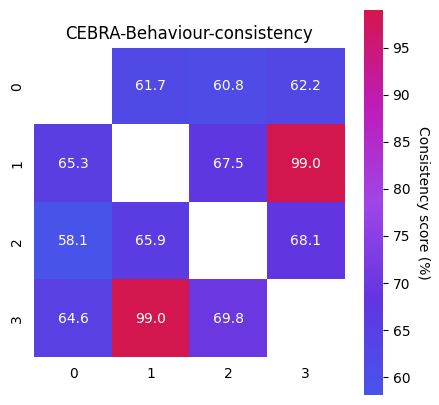

In [23]:
%matplotlib inline
ax = cebra_plot.plot_consistency(scores,
                                 pairs=pairs,
                                 datasets=runs,
                                 title="CEBRA-Behaviour-consistency", cmap='cebra')

## CEBRA on DeepLabCut

CEBRA can be used not only with neural data, but with any type of information that you want to analyse, such as DLC/pose data.

- Let's train CEBRA model only on estimated keypoints with [DeepLabCut](https://github.com/DeepLabCut).

- We have awesome integration of DeepLabCut, look [here](https://cebra.ai/docs/api/pytorch/data.html#cebra.load_deeplabcut) for more usage information on how to use deeplabcut output file directly with `cebra.load_deeplabcut`.

- we are also going to use the infoNCE + MSE loss as well.

First we will preprocess the output keypoints and "align" them to use relative information of the movements.

In [24]:
def align_poses(keypoints):
    """
    Aligns 2D keypoints by translating them to the mean position and scaling them based on the bounding box size.

    Args:
        keypoints (numpy.ndarray): 2D array of keypoints with shape (n_frames, n_kpts, 2).

    Returns:
        numpy.ndarray: Aligned keypoints with the same shape as the input.
    """
    n_frames, n_kpts = keypoints.shape
    aligned_keypoints = np.copy(keypoints)
    # Compute mean position across all frames
    mean_position = np.mean(aligned_keypoints, axis=(0, 1))
    # Translate keypoints to mean position
    aligned_keypoints -= mean_position
    # Compute maximum absolute coordinate value across all frames
    max_abs_coord = np.max(np.abs(aligned_keypoints))
    # Scale keypoints based on bounding box size
    aligned_keypoints /= max_abs_coord

    return aligned_keypoints

In [25]:
aligned_dlc_data = align_poses(dlc_data)

In [26]:
cebra_dlc_model = CEBRA(model_architecture='offset10-model-mse',
                        batch_size=512,
                        learning_rate=3e-4,
                        output_dimension=3,
                        max_iterations=iterations,
                        distance='cosine',
                        conditional='time',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

In [27]:
cebra_dlc_model.fit(aligned_dlc_data)
cebra_dlc = cebra_dlc_model.transform(aligned_dlc_data)

pos:  1.1643 neg:  4.0030 total:  5.1672 temperature:  1.0000: 100%|██████████| 3000/3000 [00:28<00:00, 104.33it/s]


Plot the MSE embedding space; here we are coloring by time, but you could also color by actions, etc...

<Axes: xlabel='Steps', ylabel='InfoNCE Loss'>

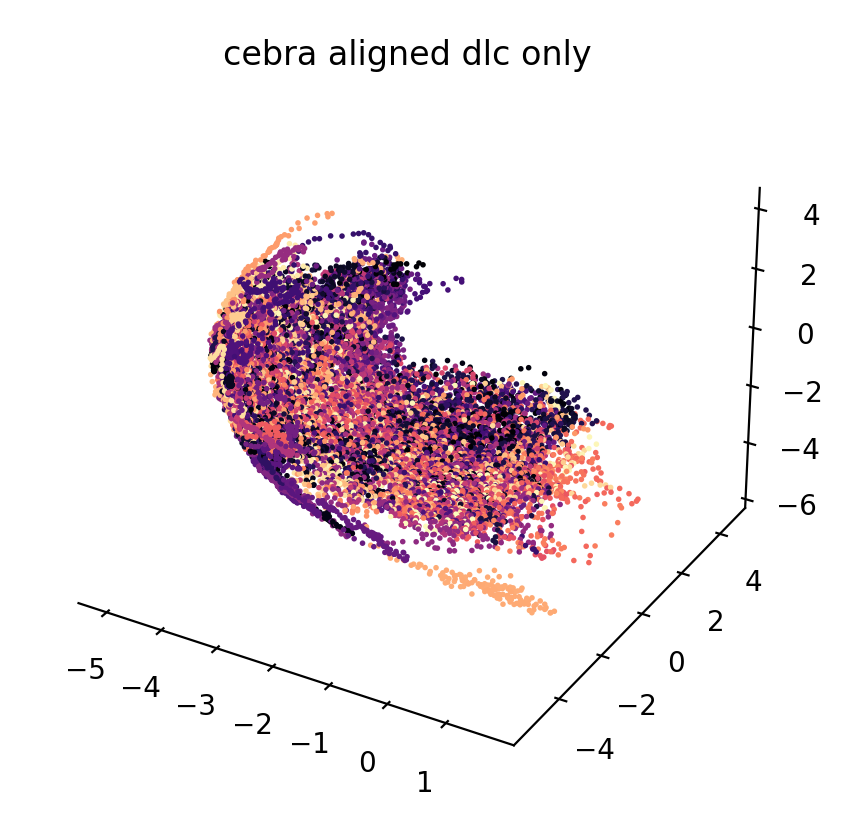

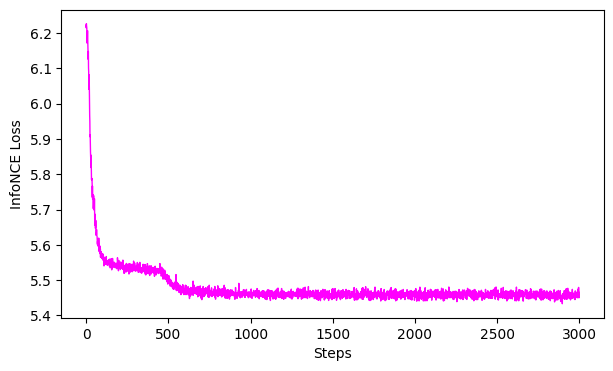

In [28]:
cebra_plot.plot_embedding(embedding = cebra_dlc,
                          cmap = 'magma',
                          embedding_labels=np.arange(aligned_dlc_data.shape[0]),
                          figsize = (5,8),
                          title='cebra aligned dlc only',
                          alpha=1, markersize=1, dpi=200)

cebra.plot_loss(cebra_beh_model)

# Decoding

- ideally, once you have good models you can also do downstream analysis, such as topology and decoding!
- here, of course we don't necessary have perfect models, but we have models :) so, we will show you how to set up decoding!

Let's start.

Lets split the data into train-test and decode estimated velocity from the latent space.

- for example, here we will take 90% to train on, and 10% held out for testing.

In [29]:
size = int(0.9 * neural_data.shape[0])

embedding_train = neural_data.iloc[:size, :]
embedding_test = neural_data.iloc[size:, :]
label_train = velocity.values[:size]
label_test = velocity.values[size:]

- we train again here since it's only on a fraction of the data:

In [30]:
cebra_decoding_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1.,
                        output_dimension=3,
                        max_iterations=500,
                        distance='cosine',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

In [31]:
cebra_decoding_model.fit(embedding_train, label_train)
neural_emb_train = cebra_decoding_model.transform(embedding_train)
neural_emb_test = cebra_decoding_model.transform(embedding_test)

pos:  0.0449 neg:  5.4160 total:  5.4610 temperature:  1.0000: 100%|██████████| 500/500 [00:05<00:00, 96.09it/s]


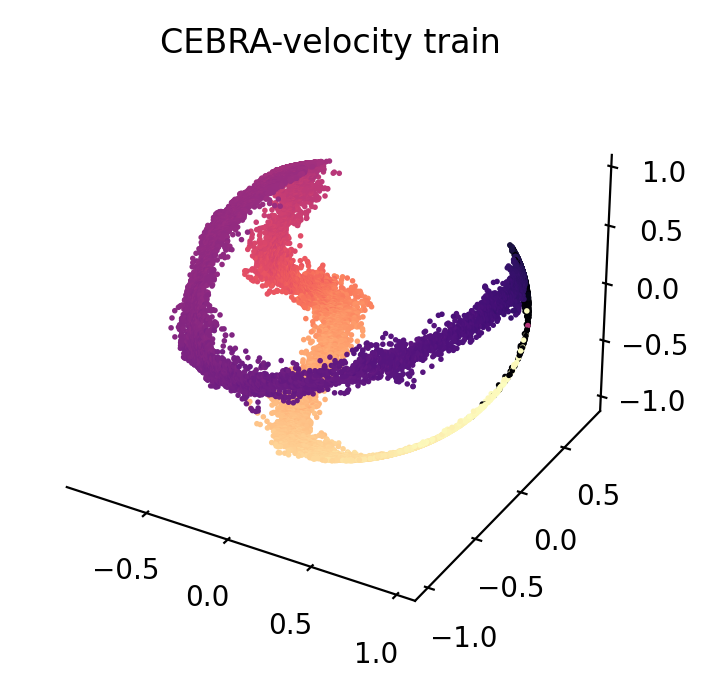

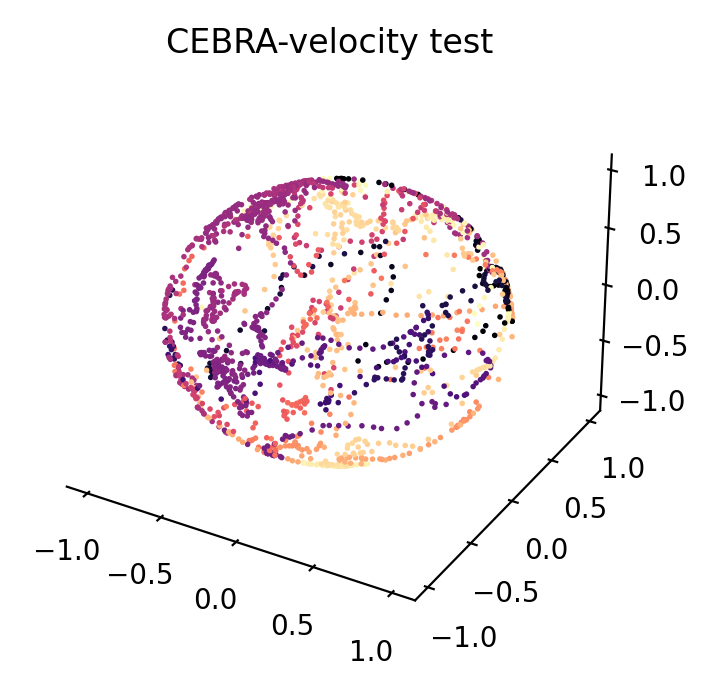

In [32]:
train_ax = cebra_plot.plot_embedding(embedding = neural_emb_train,
                          cmap = 'magma',
                          figsize = (4,8),
                          embedding_labels=label_train,
                          title='CEBRA-velocity train',
                          alpha=1, markersize=1, dpi=200)
test_ax = cebra_plot.plot_embedding(embedding = neural_emb_test,
                          cmap = 'magma',
                          figsize = (4,8),
                          embedding_labels=label_test,
                          title='CEBRA-velocity test',
                          alpha=1, markersize=1, dpi=200)

In [33]:
# Define decoding function with kNN decoder. For a simple demo, we will use the fixed number of neighbors 36.
decoder = cebra.KNNDecoder(n_neighbors=36, metric="cosine")


decoder.fit(embedding_train, np.array(label_train, dtype='float'))
score = decoder.score(embedding_train, np.array(label_train, dtype='float'))
print("train fraction decoding R^2:", score)

score_test = decoder.score(embedding_test, np.array(label_test, dtype='float'))
print("test fraction decoding R^2:", score_test)

# Get the discrete labels predictions
prediction = decoder.predict(embedding_test)

train fraction decoding R^2: 0.9003825039784742
test fraction decoding R^2: -0.3753151405426034


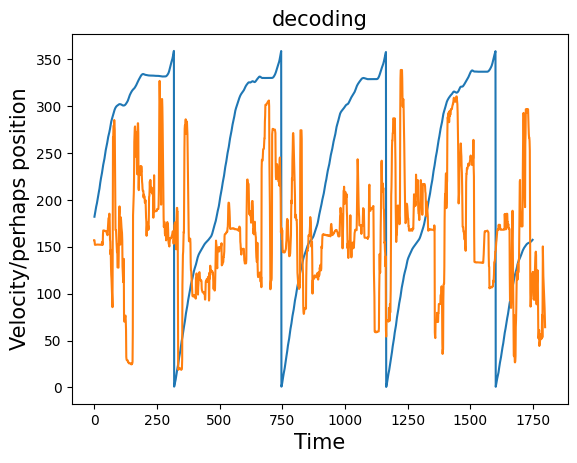

In [35]:
fontsize=15
plt.plot(velocity[1:1750])
plt.title('decoding', fontsize=fontsize)
plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Velocity/perhaps position', fontsize=fontsize)


plt.plot(prediction)